In [3]:
%pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

true_data = pd.read_csv('News_dataset/True.csv')
true_data['label'] = 1  # Label for true news
false_data = pd.read_csv('News_dataset/Fake.csv')
false_data['label'] = 0  # Label for fake news
data = pd.concat([true_data, false_data]).reset_index(drop=True)

              label
count  44898.000000
mean       0.477015
std        0.499477
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


In [ ]:
# train test split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

text_transformer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train = text_transformer.fit_transform(train_data['text'])
X_test = text_transformer.transform(test_data['text'])
y_train = train_data['label']
y_test = test_data['label']

((35918, 111127), (8980, 111127))

Cross-validated F1 scores: [0.98329426 0.98230218 0.98306569 0.97923369 0.98304094]
Mean F1 score: 0.9821873516105517
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4650
           1       0.98      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

[[4573   77]
 [  46 4284]]


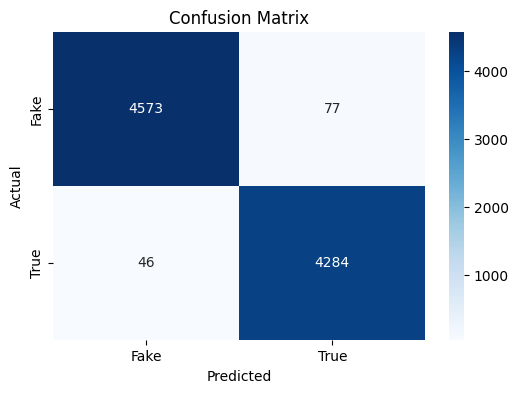

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logreg = LogisticRegression()

cv_results = cross_val_score(logreg, X_train, y_train, cv=skf, scoring='f1')
print(f'Cross-validated F1 scores: {cv_results}')
print(f'Mean F1 score: {cv_results.mean()}')

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

# plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()